### Main Code (Jeremy Tallant)

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import warnings 
warnings.filterwarnings("ignore")

# Census & gmaps API Keys
from apikeys import (api_key, gkey)
c = Census(api_key, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,42,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,2.745222
1,06,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769
2,54,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,2.878735
3,49,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,1.835119
4,36,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,2.923774
5,11,District of Columbia,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,4.172519
6,02,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,3.586073
7,12,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,2.621082
8,45,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,2.660975
9,38,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,1.691360


In [3]:
# Convert the number in the "State" column to an integer for merging later
census_pd["State"]=census_pd["State"].astype(int)
census_pd

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,42,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,2.745222
1,6,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769
2,54,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,2.878735
3,49,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,1.835119
4,36,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,2.923774
5,11,District of Columbia,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,4.172519
6,2,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,3.586073
7,12,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,2.621082
8,45,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,2.660975
9,38,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,1.691360


In [4]:
# Read the Deepsolar csv and extract the columns we want to use for analysis 
deepsolar = ("../deepsolar_tract.csv")
deepsolar_df = pd.read_csv(deepsolar, encoding="ISO-8859-1")
deepsolar_df = deepsolar_df[["fips", "state","average_household_income","number_of_years_of_education","number_of_solar_system_per_household","housing_unit_median_value","household_count","solar_system_count_residential","total_panel_area_residential","daily_solar_radiation","electricity_price_residential","lat","lon"]]

In [5]:
# Check to see if the data is clean
deepsolar_df.count()

fips                                    72537
state                                   72537
average_household_income                71651
number_of_years_of_education            71930
number_of_solar_system_per_household    71991
housing_unit_median_value               70643
household_count                         72537
solar_system_count_residential          72537
total_panel_area_residential            72537
daily_solar_radiation                   66735
electricity_price_residential           72537
lat                                     66735
lon                                     66735
dtype: int64

In [6]:
# Drop any nulls
deepsolar_clean_df = deepsolar_df.dropna()

In [7]:
# Display count of clean dataframe
deepsolar_clean_df.count()

fips                                    65140
state                                   65140
average_household_income                65140
number_of_years_of_education            65140
number_of_solar_system_per_household    65140
housing_unit_median_value               65140
household_count                         65140
solar_system_count_residential          65140
total_panel_area_residential            65140
daily_solar_radiation                   65140
electricity_price_residential           65140
lat                                     65140
lon                                     65140
dtype: int64

In [8]:
# Convert the fips column to a two digit number by dividing by a billion for merging
deepsolar_clean_df["fips"]=deepsolar_clean_df["fips"] / 1000000000

In [9]:
# Display the results
deepsolar_clean_df

,fips,state,average_household_income,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential,lat,lon
0,27.145011,mn,70352.789869,13.232410,0.000000,192500.0,2527,0.0,0.000000,3.76,12.12,45.369,-94.282
2,27.145011,mn,71496.886583,13.647991,0.001112,182400.0,2698,3.0,64.505776,3.76,12.12,45.460,-94.425
3,27.145011,mn,86840.152755,13.858796,0.000000,251400.0,1833,0.0,0.000000,3.76,12.12,45.507,-94.388
4,27.145011,mn,89135.315597,13.850956,0.002087,208600.0,1917,4.0,61.050581,3.76,12.12,45.457,-94.182
5,27.145011,mn,62225.903614,12.997977,0.000000,158700.0,2656,0.0,0.000000,3.76,12.12,45.680,-95.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72532,8.049000,co,90163.611860,14.649758,0.000449,323300.0,2226,1.0,40.277124,4.54,12.12,39.948,-105.906
72533,40.085094,ok,45124.153005,12.069754,0.000000,73500.0,915,0.0,0.000000,4.68,10.14,33.935,-97.087
72534,40.085094,ok,60878.458738,12.817441,0.000607,108700.0,1648,1.0,21.902255,4.68,10.14,33.914,-97.098
72535,40.085094,ok,56817.996870,12.635752,0.000000,80700.0,639,0.0,0.000000,4.68,10.14,33.945,-97.402


In [10]:
# Convert the fips column to an integer 
deepsolar_clean_df["fips"]=deepsolar_clean_df["fips"].astype(int)

In [11]:
# Show dataframe 
deepsolar_clean_df

,fips,state,average_household_income,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential,lat,lon
0,27,mn,70352.789869,13.232410,0.000000,192500.0,2527,0.0,0.000000,3.76,12.12,45.369,-94.282
2,27,mn,71496.886583,13.647991,0.001112,182400.0,2698,3.0,64.505776,3.76,12.12,45.460,-94.425
3,27,mn,86840.152755,13.858796,0.000000,251400.0,1833,0.0,0.000000,3.76,12.12,45.507,-94.388
4,27,mn,89135.315597,13.850956,0.002087,208600.0,1917,4.0,61.050581,3.76,12.12,45.457,-94.182
5,27,mn,62225.903614,12.997977,0.000000,158700.0,2656,0.0,0.000000,3.76,12.12,45.680,-95.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72532,8,co,90163.611860,14.649758,0.000449,323300.0,2226,1.0,40.277124,4.54,12.12,39.948,-105.906
72533,40,ok,45124.153005,12.069754,0.000000,73500.0,915,0.0,0.000000,4.68,10.14,33.935,-97.087
72534,40,ok,60878.458738,12.817441,0.000607,108700.0,1648,1.0,21.902255,4.68,10.14,33.914,-97.098
72535,40,ok,56817.996870,12.635752,0.000000,80700.0,639,0.0,0.000000,4.68,10.14,33.945,-97.402


In [12]:
# Combine all the data for the same states together using a aggregate function and display the results
agg_functions = {"fips": "first", "number_of_years_of_education":"mean","number_of_solar_system_per_household":"median","housing_unit_median_value":"median","household_count":"sum","solar_system_count_residential":"sum","total_panel_area_residential":"sum","daily_solar_radiation":"mean","electricity_price_residential":"median"}
test_df = deepsolar_clean_df.groupby(deepsolar_clean_df['state']).aggregate(agg_functions)
test_df

,fips,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential
state,,,,,,,,,
al,1,13.003808,0.000430,104550.0,1843070,1652.0,4.129134e+04,4.362101,11.70
ar,5,12.830270,0.000526,89500.0,945821,882.0,2.183562e+04,4.273940,9.82
az,4,13.459671,0.021081,151050.0,2397525,83476.0,2.587874e+06,5.386253,12.13
ca,6,13.409571,0.030414,362850.0,12542060,625476.0,1.576803e+07,5.128937,16.99
co,8,14.115496,0.008600,235900.0,2006905,29000.0,7.044881e+05,4.597379,12.12
ct,9,14.003160,0.009417,244100.0,1345439,15688.0,4.227177e+05,3.785595,20.94
dc,11,14.799600,0.006762,432800.0,240110,1833.0,4.590642e+04,3.984444,12.99
de,10,13.624432,0.006725,220050.0,306009,2759.0,7.937048e+04,3.907604,13.42
fl,12,13.457360,0.006778,143100.0,7269480,140081.0,3.717083e+06,4.827880,11.58


In [13]:
# Rename the fips column to State to merge with Census dataframe
rename_df = test_df.rename(columns = {'fips': 'State'})
rename_df = rename_df.reset_index()
rename_df

,state,State,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential
0,al,1,13.003808,0.000430,104550.0,1843070,1652.0,4.129134e+04,4.362101,11.70
1,ar,5,12.830270,0.000526,89500.0,945821,882.0,2.183562e+04,4.273940,9.82
2,az,4,13.459671,0.021081,151050.0,2397525,83476.0,2.587874e+06,5.386253,12.13
3,ca,6,13.409571,0.030414,362850.0,12542060,625476.0,1.576803e+07,5.128937,16.99
4,co,8,14.115496,0.008600,235900.0,2006905,29000.0,7.044881e+05,4.597379,12.12
5,ct,9,14.003160,0.009417,244100.0,1345439,15688.0,4.227177e+05,3.785595,20.94
6,dc,11,14.799600,0.006762,432800.0,240110,1833.0,4.590642e+04,3.984444,12.99
7,de,10,13.624432,0.006725,220050.0,306009,2759.0,7.937048e+04,3.907604,13.42
8,fl,12,13.457360,0.006778,143100.0,7269480,140081.0,3.717083e+06,4.827880,11.58
9,ga,13,13.311449,0.000532,123950.0,3546209,3268.0,8.113906e+04,4.342073,11.54


In [14]:
# Merge with the census dataframe on the column "State" and display the results
final_df = pd.merge(census_pd, rename_df, on = "State", how = "left")
final_df

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,state,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential
0,42,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,2.745222,pa,13.472963,0.001050,150700.0,4270226.0,8238.0,2.025491e+05,3.715775,13.64
1,6,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769,ca,13.409571,0.030414,362850.0,12542060.0,625476.0,1.576803e+07,5.128937,16.99
2,54,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,2.878735,wv,12.860153,0.000000,95600.0,714719.0,499.0,1.122905e+04,3.786638,10.08
3,49,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,1.835119,ut,13.952787,0.010257,208200.0,795526.0,11149.0,2.535065e+05,4.688451,10.88
4,36,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,2.923774,ny,13.655858,0.001493,354650.0,6925678.0,52873.0,1.366822e+06,3.821709,18.54
5,11,District of Columbia,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,4.172519,dc,14.799600,0.006762,432800.0,240110.0,1833.0,4.590642e+04,3.984444,12.99
6,2,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,3.586073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,2.621082,fl,13.457360,0.006778,143100.0,7269480.0,140081.0,3.717083e+06,4.827880,11.58
8,45,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,2.660975,sc,13.259044,0.001246,124900.0,1579901.0,4569.0,1.221164e+05,4.379648,12.57
9,38,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,1.691360,nd,13.599465,0.000357,126100.0,252332.0,273.0,5.715009e+03,3.735086,9.62


In [15]:
# Drop any nulls, clean up column names, and display the results
df = final_df.dropna()
df = df.rename(columns={'State': 'Fips','state':'State', 'number_of_years_of_education': 'Years of Education', 'number_of_solar_system_per_household': 'Solar System Per Household', 'housing_unit_median_value': 'Median Housing Unit Value','household_count':'Household Count', 'solar_system_count_residential':'Solar System Count Residential', 'total_panel_area_residential': 'Total Panel Area Residential', 'daily_solar_radiation':'Daily Solar Radiation', 'electricity_price_residential': 'Electricitity Price Residential'})
df

,Fips,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State,Years of Education,Solar System Per Household,Median Housing Unit Value,Household Count,Solar System Count Residential,Total Panel Area Residential,Daily Solar Radiation,Electricitity Price Residential
0,42,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,2.745222,pa,13.472963,0.001050,150700.0,4270226.0,8238.0,2.025491e+05,3.715775,13.64
1,6,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769,ca,13.409571,0.030414,362850.0,12542060.0,625476.0,1.576803e+07,5.128937,16.99
2,54,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,2.878735,wv,12.860153,0.000000,95600.0,714719.0,499.0,1.122905e+04,3.786638,10.08
3,49,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,1.835119,ut,13.952787,0.010257,208200.0,795526.0,11149.0,2.535065e+05,4.688451,10.88
4,36,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,2.923774,ny,13.655858,0.001493,354650.0,6925678.0,52873.0,1.366822e+06,3.821709,18.54
5,11,District of Columbia,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,4.172519,dc,14.799600,0.006762,432800.0,240110.0,1833.0,4.590642e+04,3.984444,12.99
7,12,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,2.621082,fl,13.457360,0.006778,143100.0,7269480.0,140081.0,3.717083e+06,4.827880,11.58
8,45,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,2.660975,sc,13.259044,0.001246,124900.0,1579901.0,4569.0,1.221164e+05,4.379648,12.57
9,38,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,1.691360,nd,13.599465,0.000357,126100.0,252332.0,273.0,5.715009e+03,3.735086,9.62
10,23,Maine,1340825.0,44.8,59489.0,33774.0,144384.0,10.768296,2.121231,me,13.692059,0.000000,167800.0,454650.0,457.0,9.935729e+03,3.601679,15.61


### Ed's Code (Ed Spiezio-Runyon)

In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from scipy.stats import linregress

# Census & gmaps API Keys
from apikeys import (api_key, gkey)
c = Census(api_key, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [17]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


The r-value is: 0.1768940875778434


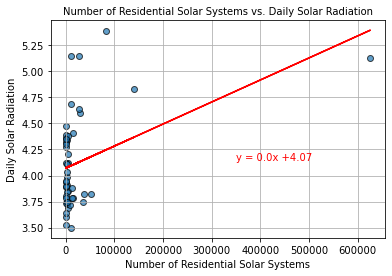

In [18]:
# Graph and linear regression on daily_solar_radiation.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["daily_solar_radiation"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Daily Solar Radiation")
plt.title(f"Number of Residential Solar Systems vs. Daily Solar Radiation", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

The r-value is: 0.056781705833307876


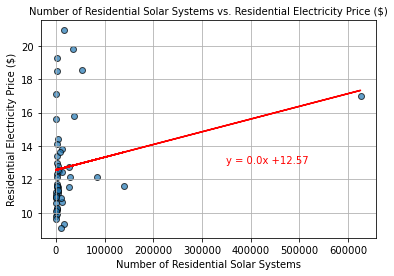

In [19]:
# Graph and linear regression on electricity_price_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["electricity_price_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Residential Electricity Price ($)")
plt.title(f"Number of Residential Solar Systems vs. Residential Electricity Price ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_electricity_price_residential.png")

# Show plot
plt.show()

The r-value is: 0.10980708238072764


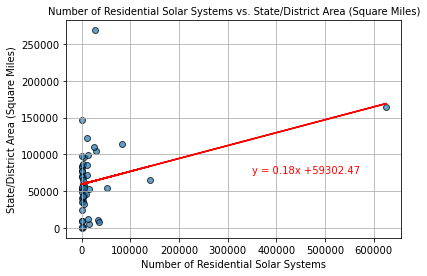

In [20]:
# Graph and linear regression on square_miles.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["square_miles"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 75000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("State/District Area (Square Miles)")
plt.title(f"Number of Residential Solar Systems vs. State/District Area (Square Miles)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_square_miles.png")

# Show plot
plt.show()

The r-value is: 0.0004471014290648878


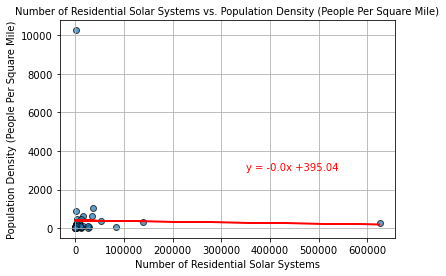

In [21]:
# Graph and linear regression on pop_density.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["pop_density"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population Density (People Per Square Mile)")
plt.title(f"Number of Residential Solar Systems vs. Population Density (People Per Square Mile)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_pop_density.png")

# Show plot
plt.show()

The r-value is: 0.5397707924536225


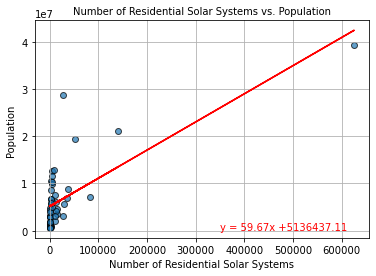

In [22]:
# Graph and linear regression on population.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Population"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population ")
plt.title(f"Number of Residential Solar Systems vs. Population", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_population.png")

# Show plot
plt.show()

The r-value is: 0.006937545754935518


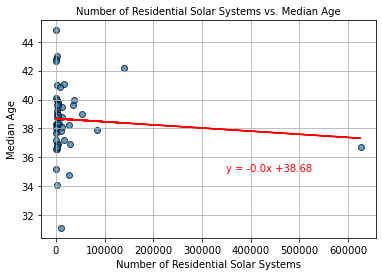

In [23]:
# Graph and linear regression on Median Age.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Median Age"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 35), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Age")
plt.title(f"Number of Residential Solar Systems vs. Median Age", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_median_age.png")

# Show plot
plt.show()

The r-value is: 0.045597963786302584


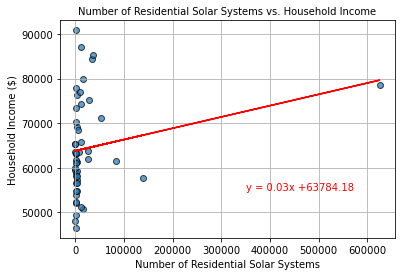

In [24]:
# Graph and linear regression on Household Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Household Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 55000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Household Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Household Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_household_income.png")

# Show plot
plt.show()

The r-value is: 0.012757423326646424


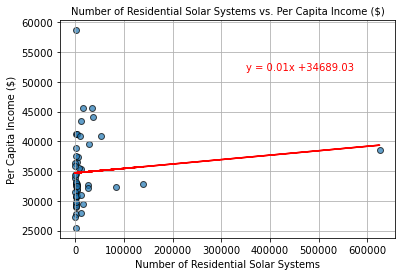

In [25]:
# Graph and linear regression on Per Capita Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Per Capita Income ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_per_capita_income.png")

# Show plot
plt.show()

The r-value is: 0.493225919667463


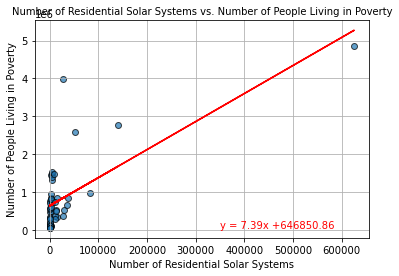

In [26]:
# Graph and linear regression on Poverty Count.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Count"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of People Living in Poverty")
plt.title(f"Number of Residential Solar Systems vs. Number of People Living in Poverty", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_count.png")

# Show plot
plt.show()

The r-value is: 9.775501879641278e-07


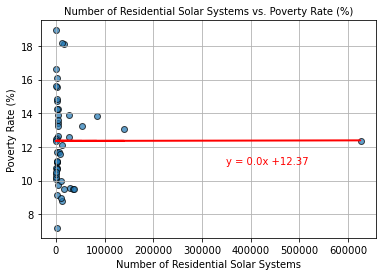

In [27]:
# Graph and linear regression on Poverty Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 11), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Poverty Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Poverty Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_rate.png")

# Show plot
plt.show()

The r-value is: 0.044184678811169005


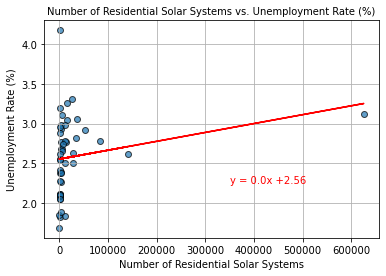

In [28]:
# Graph and linear regression on Unemployment Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Unemployment Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 2.25), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Unemployment Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Unemployment Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_unemployment_rate.png")

# Show plot
plt.show()

The r-value is: 0.0009728861989492472


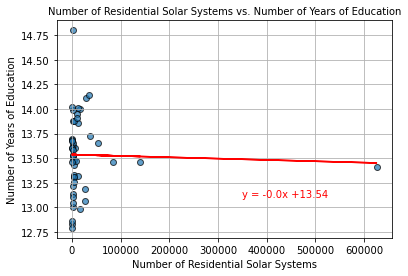

In [29]:
# Graph and linear regression on number_of_years_of_education.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_years_of_education"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13.1), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Years of Education")
plt.title(f"Number of Residential Solar Systems vs. Number of Years of Education", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_years_of_education.png")

# Show plot
plt.show()

The r-value is: 0.4918163406481238


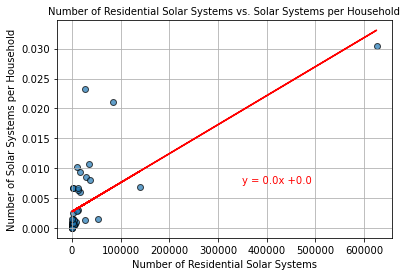

In [30]:
# Graph and linear regression on number_of_solar_system_per_household.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_solar_system_per_household"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, .0075), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Solar Systems per Household")
plt.title(f"Number of Residential Solar Systems vs. Solar Systems per Household", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_solar_systems_per_household.png")

# Show plot
plt.show()

The r-value is: 0.14728438225662202


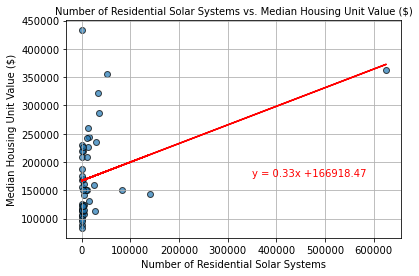

In [31]:
# Graph and linear regression on housing_unit_median_value.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["housing_unit_median_value"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 175000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Housing Unit Value ($)")
plt.title(f"Number of Residential Solar Systems vs. Median Housing Unit Value ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_housing_unit_median_value.png")

# Show plot
plt.show()

The r-value is: 0.9989311947097212


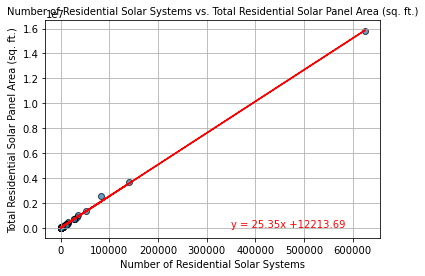

In [32]:
# Graph and linear regression on total_panel_area_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["total_panel_area_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Total Residential Solar Panel Area (sq. ft.)")
plt.title(f"Number of Residential Solar Systems vs. Total Residential Solar Panel Area (sq. ft.)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_total_panel_area_residential.png")

# Show plot
plt.show()

The r-value is: 0.11181794535448866


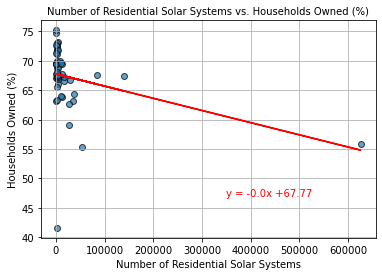

In [33]:
# Graph and linear regression on owned_households_%.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["owned_households_%"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 47), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Households Owned (%)")
plt.title(f"Number of Residential Solar Systems vs. Households Owned (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_owned_households_%.png")

# Show plot
plt.show()

In [34]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


In [35]:
# Set the base map API code
gmaps.configure(api_key=gkey)

# Heat map for MW currently installed by state (large point radius)
# Store the location and MW currently installed data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_current = combined_df["MW_currently_installed"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_current, dissipating = False, point_radius = 3)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [36]:
# Heat map for MW currently installed by state (small point radius)
# Store the location and MW currently installed data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_current_small_point = combined_df["MW_currently_installed"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_current_small_point, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [37]:
# Heat map for projected solar growth by state (large point radius)
# Store the location and MW projected data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_projected = combined_df["MW_growth_projection_5_years"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_projected, dissipating = False, point_radius = 3)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [38]:
# Heat map for projected solar growth by state (small point radius)
# Store the location and MW projected data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_projected_small_point = combined_df["MW_growth_projection_5_years"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_projected_small_point, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [39]:
# Heat map showing daily solar radiation by state
# Store the location and daily solar radiation data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
solar_radiation = combined_df["daily_solar_radiation"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = solar_radiation, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [40]:
# Heat map showing per capita income by state
# Store the location and per capita income data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
per_capita = combined_df["Per Capita Income"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = per_capita, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [41]:
# Heat map showing electricity costs by state
# Store the location and residential electricity cost data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
elect_price = combined_df["electricity_price_residential"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = elect_price, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [42]:
# Create dataframe of MW_currently_installed by state
MW_current_by_state_df = combined_df[["Name", "MW_currently_installed"]]
MW_current_by_state_df.sort_values(by="MW_currently_installed", ascending=False).head(10)

,Name,MW_currently_installed
3,California,37086
41,Texas,15079
8,Florida,9539
31,North Carolina,8018
1,Arizona,5984
26,Nevada,5003
9,Georgia,4566
28,New Jersey,4097
19,Massachusetts,3986
44,Virginia,3845


In [43]:
# Create dataframe of MW_growth_projection_5_years
MW_proj_total_by_state_df = combined_df[["Name", "MW_growth_projection_5_years"]]
MW_proj_total_by_state_df.sort_values(by="MW_growth_projection_5_years", ascending=False).head(10)

,Name,MW_growth_projection_5_years
41,Texas,40136
3,California,24874
33,Ohio,11226
8,Florida,10935
12,Indiana,8741
30,New York,8313
26,Nevada,7707
44,Virginia,7013
1,Arizona,5342
11,Illinois,5085


In [44]:
# Create dataframe of MW_total_in_5_years
MW_proj_total_by_state_df = combined_df[["Name", "MW_total_in_5_years"]]
MW_proj_total_by_state_df.sort_values(by="MW_total_in_5_years", ascending=False).head(10)

,Name,MW_total_in_5_years
3,California,61960
41,Texas,55215
8,Florida,20474
26,Nevada,12710
33,Ohio,12126
30,New York,12117
1,Arizona,11326
44,Virginia,10858
12,Indiana,10132
31,North Carolina,9920


In [45]:
# Create dataframe of 10 states with highest electricity prices
top10elect_df = combined_df[["Name", "electricity_price_residential"]]
top10elect_df.sort_values(by="electricity_price_residential", ascending=False).head(10)

,Name,electricity_price_residential
5,Connecticut,20.94
19,Massachusetts,19.83
37,Rhode Island,19.29
30,New York,18.54
27,New Hampshire,18.50
43,Vermont,17.09
3,California,16.99
28,New Jersey,15.81
17,Maine,15.61
20,Michigan,14.42


In [46]:
# Create dataframe of 10 states with lowest electricity prices
bottom10_elect_df = combined_df[["Name", "electricity_price_residential"]]
bottom10_elect_df.sort_values(by="electricity_price_residential", ascending=True).head(10)

,Name,electricity_price_residential
45,Washington,9.09
16,Louisiana,9.33
32,North Dakota,9.62
2,Arkansas,9.82
10,Idaho,9.93
46,West Virginia,10.08
34,Oklahoma,10.14
15,Kentucky,10.24
40,Tennessee,10.30
25,Nebraska,10.60


### Alysson's Code (Allyson McInnis)

In [47]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [48]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


In [49]:
#Take columns 'name' and 'solar system count residential' and merge them into their own data frame
states_df= combined_df[["Name","solar_system_count_residential"]]
states_df.reset_index()

,index,Name,solar_system_count_residential
0,0,Alabama,1652
1,1,Arizona,83476
2,2,Arkansas,882
3,3,California,625476
4,4,Colorado,29000
5,5,Connecticut,15688
6,6,Delaware,2759
7,7,District of Columbia,1833
8,8,Florida,140081
9,9,Georgia,3268


In [50]:
#Remove just the northern border states from the dataframe
northern_states_df= states_df.iloc[[33, 18, 23, 8, 41, 36, 39, 25, 4, 30, 12, 9]]
northern_states_df

,Name,solar_system_count_residential
33,Ohio,4646
18,Maryland,12960
23,Missouri,3966
8,Florida,140081
41,Texas,27187
36,Pennsylvania,8238
39,South Dakota,218
25,Nebraska,855
4,Colorado,29000
30,New York,52873


In [51]:
#Remove just the southern border states from the dataframe
southern_states_df= states_df.iloc[[1, 15, 43, 22, 16, 37, 11, 6]]
southern_states_df

,Name,solar_system_count_residential
1,Arizona,83476
15,Kentucky,1193
43,Vermont,526
22,Mississippi,785
16,Louisiana,15366
37,Rhode Island,1259
11,Illinois,5414
6,Delaware,2759


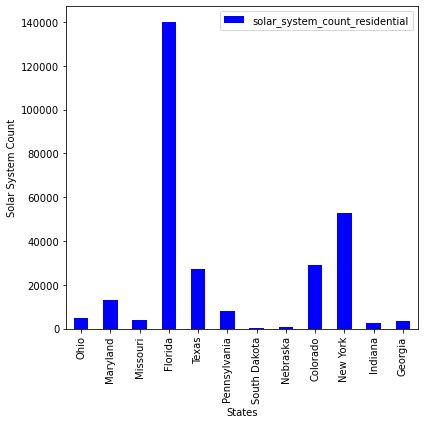

In [52]:
#Make a bar chart reflecting the amount of solar systems in the northern border states
northern_bar= northern_states_df.plot.bar(x="Name", y="solar_system_count_residential", figsize=(6,6), color="blue")
plt.xlabel("States")
plt.ylabel("Solar System Count")
plt.tight_layout()
plt.show()

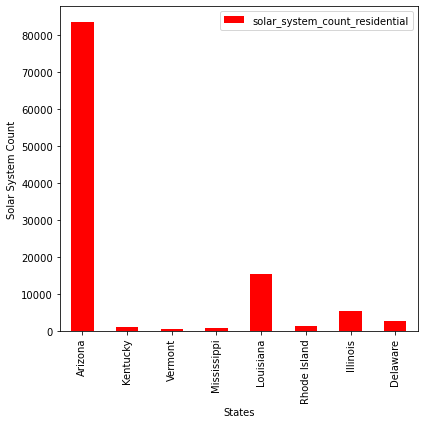

In [53]:
#Make a bar chart reflecting the amount of solar systems in the southern border states
southern_bar= southern_states_df.plot.bar(x="Name", y="solar_system_count_residential", figsize=(6,6), color="red")
plt.xlabel("States")
plt.ylabel("Solar System Count")
plt.tight_layout()
plt.show()

In [54]:
northern_total= sum(northern_states_df["solar_system_count_residential"])
northern_total

285970

In [55]:
southern_total= sum(southern_states_df["solar_system_count_residential"])
southern_total

110778

### Liberty's Code (Liberty Heise)

In [56]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from scipy.stats import linregress

In [57]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


In [58]:
# Load the updated and combined CSV file that has further info on rent and solar companies in the state
up_combined_df = pd.read_csv("combined.csv")

# Display sample data
up_combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


The r-value is: 0.012757423326646424


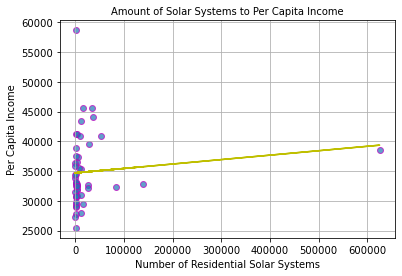

In [59]:
# Graph and linear regression 
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "m")
plt.plot(x_values, regress_values, "y")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income")
plt.title(f"Amount of Solar Systems to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_PerCapitaIncome.png")

# Show plot
plt.show()

In [60]:
# Determine states with highest per capita income

combined_df.sort_values(by=["Per Capita Income"], ascending=False)

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
19,23,25,Massachusetts,42.3588,-71.0638,6873003,39.6,84385,45555,653454,...,63.2,36.8,672249,31.995646,0.2005,433,3986,1866,5852,146.813849
28,29,34,New Jersey,40.2202,-74.7710,8885418,40.0,85245,44153,842704,...,64.4,35.6,662947,25.106902,0.0676,370,4097,2353,6450,157.432267
18,30,24,Maryland,38.8851,-76.9158,6037624,38.8,87063,43352,531553,...,67.8,32.2,170049,10.350690,0.0446,176,1504,1446,2950,196.143617
44,31,51,Virginia,37.5387,-77.4337,8509358,38.4,76398,41255,826708,...,67.6,32.4,429217,15.678266,0.0499,179,3845,7013,10858,282.392718
27,13,33,New Hampshire,43.2069,-71.5381,1355244,43.0,77923,41234,97418,...,72.5,27.5,28327,6.175092,0.0117,55,184,631,815,442.934783
30,4,36,New York,42.6528,-73.7572,19514849,39.0,71117,40898,2581048,...,55.4,44.6,632257,9.129171,0.0355,645,3804,8313,12117,318.533123
45,35,53,Washington,38.8899,-77.0091,7512465,37.8,77006,40837,751044,...,64.0,36.0,32305,1.328958,0.0035,131,332,1294,1626,489.759036
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891


In [61]:
# Determine states with hightest poverty rate

combined_df.sort_values(by=["Poverty Rate"], ascending=False)

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
22,39,28,Mississippi,32.3035,-90.1821,2981835,37.7,46511,25444,564439,...,69.7,30.3,34369,3.618917,0.0072,13,321,2300,2621,816.510903
29,45,35,New Mexico,35.6824,-105.9399,2097021,38.1,51243,27945,381026,...,69.5,30.5,344556,45.448622,0.0605,69,1452,4365,5817,400.619835
16,17,22,Louisiana,30.4571,-91.1874,4664616,37.2,50800,29522,845230,...,67.3,32.7,20352,1.525889,0.0043,55,211,2851,3062,1451.184834
46,2,54,West Virginia,38.3364,-81.6122,1807426,42.7,48037,27346,300152,...,75.2,24.8,2068,0.289344,0.0004,17,23,816,839,3647.826087
15,49,21,Kentucky,38.1867,-84.8754,4461952,39.0,52238,29123,717895,...,68.7,31.3,7588,0.569511,0.0018,38,78,1594,1672,2143.589744
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
34,37,40,Oklahoma,35.4922,-97.5032,3949342,36.7,53840,29873,585520,...,65.5,34.5,11517,0.899529,0.0018,26,100,2877,2977,2977.000000
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
38,8,45,South Carolina,34.0001,-81.0330,5091517,39.7,54864,30727,726470,...,71.8,28.2,239383,15.151772,0.0282,73,2044,1456,3500,171.232877


The r-value is: 0.2912197566340232


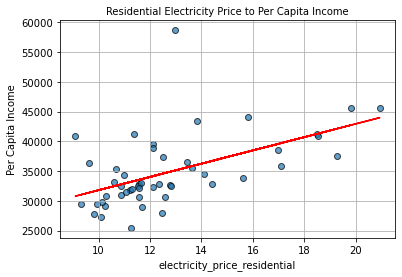

In [62]:
# Graph and linear regression 
x_values = combined_df["electricity_price_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 350000), fontsize = 10, color = "red")
plt.xlabel("electricity_price_residential")
plt.ylabel("Per Capita Income")
plt.title(f"Residential Electricity Price to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

The r-value is: 0.2938758729082063


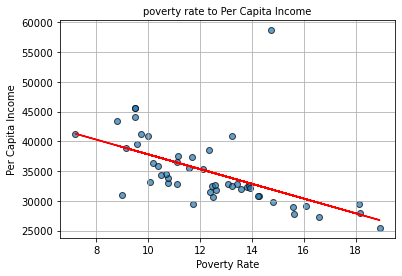

In [63]:
# Graph and linear regression
x_values = combined_df["Poverty Rate"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 350000), fontsize = 10, color = "red")
plt.xlabel("Poverty Rate")
plt.ylabel("Per Capita Income")
plt.title(f"poverty rate to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_povertyRate_vs_PerCapitaIncome.png")

# Show plot
plt.show()

In [64]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame
income_df= combined_df[["Per Capita Income","solar_system_count_residential"]]
income_df.reset_index()
income_df.sort_values(by=["solar_system_count_residential"], ascending=False)

,Per Capita Income,solar_system_count_residential
3,38576,625476
8,32848,140081
1,32340,83476
30,40898,52873
28,44153,36756
19,45555,34626
4,39545,29000
41,32177,27187
26,32629,26572
5,45668,15688


In [65]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame

up_combined_df.sort_values(by=["Per Capita Income"], ascending=False)

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
19,23,25,Massachusetts,42.3588,-71.0638,6873003,39.6,84385,45555,653454,...,63.2,36.8,672249,31.995646,0.2005,433,3986,1866,5852,146.813849
28,29,34,New Jersey,40.2202,-74.7710,8885418,40.0,85245,44153,842704,...,64.4,35.6,662947,25.106902,0.0676,370,4097,2353,6450,157.432267
18,30,24,Maryland,38.8851,-76.9158,6037624,38.8,87063,43352,531553,...,67.8,32.2,170049,10.350690,0.0446,176,1504,1446,2950,196.143617
44,31,51,Virginia,37.5387,-77.4337,8509358,38.4,76398,41255,826708,...,67.6,32.4,429217,15.678266,0.0499,179,3845,7013,10858,282.392718
27,13,33,New Hampshire,43.2069,-71.5381,1355244,43.0,77923,41234,97418,...,72.5,27.5,28327,6.175092,0.0117,55,184,631,815,442.934783
30,4,36,New York,42.6528,-73.7572,19514849,39.0,71117,40898,2581048,...,55.4,44.6,632257,9.129171,0.0355,645,3804,8313,12117,318.533123
45,35,53,Washington,38.8899,-77.0091,7512465,37.8,77006,40837,751044,...,64.0,36.0,32305,1.328958,0.0035,131,332,1294,1626,489.759036
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891


The r-value is: 0.18445662181572212


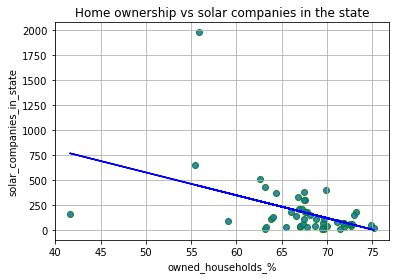

In [66]:
# Graph and linear regression for solar companies in the state 
x_values = up_combined_df["owned_households_%"]
y_values = up_combined_df["solar_companies_in_state"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.9, edgecolors = "g")
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (350000, 350000), fontsize = 12, color = "red")
plt.xlabel("owned_households_%")
plt.ylabel("solar_companies_in_state")
plt.title(f"Home ownership vs solar companies in the state", fontsize = 12)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/LH_owned_vs_solar_comp.png")

# Show plot
plt.show()

The r-value is: 0.18445662181572212


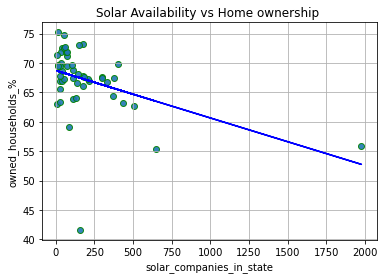

In [67]:
# Graph and linear regression for solar companies in the state 
x_values = up_combined_df["solar_companies_in_state"]
y_values = up_combined_df["owned_households_%"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.9, edgecolors = "g")
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (350000, 350000), fontsize = 12, color = "red")
plt.xlabel("solar_companies_in_state")
plt.ylabel("owned_households_%")
plt.title(f"Solar Availability vs Home ownership ", fontsize = 12)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/LH_owned_vs_solar_comp.png")

# Show plot
plt.show()

In [68]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame
income_df= combined_df[["Per Capita Income","solar_system_count_residential"]]
income_df.reset_index()
income_df.sort_values(by=["solar_system_count_residential"], ascending=False)

,Per Capita Income,solar_system_count_residential
3,38576,625476
8,32848,140081
1,32340,83476
30,40898,52873
28,44153,36756
19,45555,34626
4,39545,29000
41,32177,27187
26,32629,26572
5,45668,15688


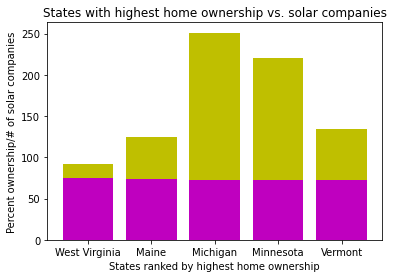

In [69]:
# importing package
import matplotlib.pyplot as plt
 
# create data
x = ['West Virginia', 'Maine', 'Michigan', 'Minnesota', 'Vermont']
y1 = [75, 74, 73, 73, 72]
y2 = [17, 50, 178, 147, 62]
 
# plot bars in stack manner
plt.bar(x, y1, color='m')
plt.bar(x, y2, bottom=y1, color='y')
plt.xlabel("States ranked by highest home ownership")
plt.ylabel ("Percent ownership/# of solar companies")
plt.title("States with highest home ownership vs. solar companies")
plt.show()

Text(0.5, 1.0, 'Top 5 highest PCI - home ownership vs solar avail')

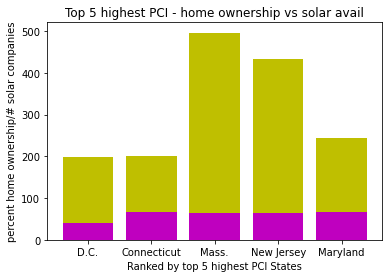

In [70]:
# importing package
import matplotlib.pyplot as plt
 
# create data
highest_per_cap_states = ['D.C.', 'Connecticut', 'Mass.', 'New Jersey', 'Maryland']
home_ownership = [41, 66, 63, 64, 67]
solar_avail = [157, 135, 433, 370, 176]
 
# plot bars in stack manner
plt.show()
plt.bar(highest_per_cap_states, home_ownership, color='m')
plt.bar(highest_per_cap_states, solar_avail, bottom=home_ownership, color='y')
plt.ylabel("percent home ownership/# solar companies")
plt.xlabel("Ranked by top 5 highest PCI States")
plt.title("Top 5 highest PCI - home ownership vs solar avail")

### Eric's Code (Eric Squires)

In [77]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
#from census import Census
import gmaps
from scipy.stats import linregress
import numpy as np
import os
from apikeys import gkey

In [78]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


In [79]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store the latitude and longitude in locations and store the humidity to be used as the weight
locations = combined_df[["Lat", "Lng"]].astype(float)
futureIncrease = combined_df["MW_growth_projection_5_years"].astype(float)
radiation = combined_df["daily_solar_radiation"].astype(float)

In [80]:
# Plot Heatmap 
fig = gmaps.figure()

# Create heat layer
future_layer = gmaps.heatmap_layer(locations, weights = futureIncrease, dissipating = False, 
                                 max_intensity = max(futureIncrease), point_radius = 4)

# Add heat layer 
fig.add_layer(future_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [81]:
# Narrow down cities for ideal weather conditions and drop any null values
ideal_solar = combined_df.loc[(combined_df["daily_solar_radiation"] >= 4) & (combined_df["electricity_price_residential"] >= 12) & (combined_df["pop_density"] <= 80)].dropna()

# Reset the index
ideal_solar = ideal_solar.reset_index(drop = True)

# Display results
ideal_solar

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
1,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
2,36,20,Kansas,39.0483,-95.6781,2912619,36.9,61091,32798,323644,...,67.0,33.0,15102,1.710961,0.0022,42,106,1308,1414,1333.962264
3,46,32,Nevada,39.1641,-119.7661,3030281,38.2,62043,32629,381695,...,59.1,40.9,857303,113.331209,0.2187,87,5003,7707,12710,254.047572
4,45,35,New Mexico,35.6824,-105.9399,2097021,38.1,51243,27945,381026,...,69.5,30.5,344556,45.448622,0.0605,69,1452,4365,5817,400.619835


In [82]:
# Plot Heatmap 
fig = gmaps.figure()

# Create heat layer
ideal_solar = gmaps.heatmap_layer(locations, weights = radiation, dissipating = False, 
                                 max_intensity = max(radiation), point_radius = 4)

# Add heat layer 
fig.add_layer(ideal_solar)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))